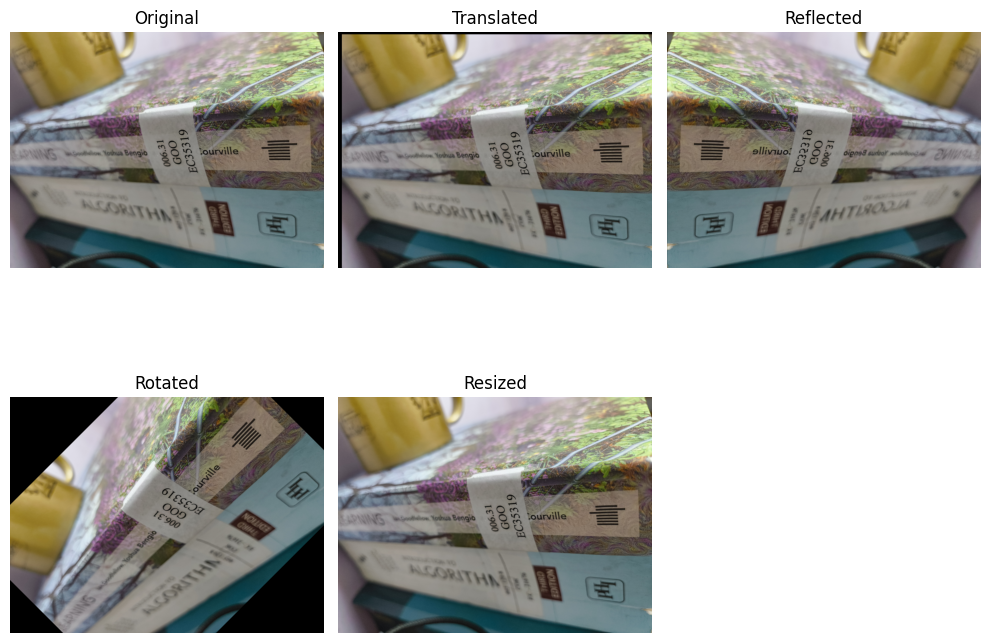

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply affine transformations
def apply_affine_transform(image, transformation_type):
    rows, cols = image.shape[:2]

    if transformation_type == "translation":
        M = np.float32([[1, 0, 50], [0, 1, 30]])  # Translate by (50, 30)
    elif transformation_type == "reflection":
        M = np.float32([[-1, 0, cols], [0, 1, 0]])  # Reflect horizontally
    elif transformation_type == "rotation":
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)  # Rotate 45 degrees
    elif transformation_type == "resizing":
        return cv2.resize(image, (cols // 2, rows // 2))  # Downscale by 2
    else:
        raise ValueError("Invalid transformation type!")

    return cv2.warpAffine(image, M, (cols, rows))

# Load  pair of images 
image1 = cv2.imread('image_registration_dataset/book_base.jpg', cv2.IMREAD_COLOR)
image2 = cv2.imread('image_registration_dataset/book_register.jpg', cv2.IMREAD_COLOR)

# Apply transformations
translated_image = apply_affine_transform(image1, "translation")
reflected_image = apply_affine_transform(image1, "reflection")
rotated_image = apply_affine_transform(image1, "rotation")
resized_image = apply_affine_transform(image1, "resizing")

# Display results
plt.figure(figsize=(10, 8))
titles = ['Original', 'Translated', 'Reflected', 'Rotated', 'Resized']
images = [image1, translated_image, reflected_image, rotated_image, resized_image]

for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
